<a href="https://colab.research.google.com/github/Aranzazu21/Machine-Learning/blob/main/Hands_on_3_Polynomial_Regression_A_Comprehensive_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-on: Polynomial Regression
**Alumno:** Jorge Limón Aranzazu  
**Materia:** Inteligencia Artificial  
**Fecha:** 28/10/2025

*Introducción*

## **1. Introducción a la Regresión Polinómica**
La **regresión polinómica** es una extensión de la regresión lineal que permite modelar la relación entre la variable dependiente `y` y la variable independiente `x` como un polinomio de grado `n`.  

Esto es especialmente útil cuando los datos muestran una **relación no lineal** que una regresión lineal simple no puede capturar.  
La ecuación general de la regresión polinómica es:

\[
y = \beta_0 + \beta_1 x + \beta_2 x^2 + ... + \beta_n x^n + \epsilon
\]

- `y`: variable dependiente  
- `x`: variable independiente  
- `β0, β1, ..., βn`: coeficientes que el modelo aprende  
- `ε`: término de error

**Ventajas de la regresión polinómica:**
1. Captura relaciones no lineales entre variables.  
2. Mayor flexibilidad que la regresión lineal simple.  
3. Ajuste más preciso cuando los datos no son lineales.  


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## **Paso 2: Cargar el Dataset**

Cargamos el **Boston Housing Dataset** que contiene información sobre viviendas y sus precios.  

- `X`: variables independientes (características de las casas).  
- `y`: variable dependiente (precio de la vivienda).


In [49]:


# Dataset simulado tipo Boston Housing (10 ejemplos)
X = np.array([0.00632, 0.02731, 0.02729, 0.03237, 0.06905,
              0.02985, 0.08829, 0.14455, 0.21124, 0.17004]).reshape(-1,1)
y = np.array([24, 21.6, 34.7, 33.4, 36.2,
              28.7, 22.9, 27.1, 16.5, 18.9])


## **Paso 3: Dividir los datos en entrenamiento y prueba**

Dividimos los datos en dos partes:  
- **80% entrenamiento** para entrenar el modelo.  
- **20% prueba** para evaluar su desempeño.

Esto ayuda a validar cómo el modelo generaliza a datos que no ha visto.


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Paso 4: Generar características polinómicas**

Transformamos las variables independientes `X` en **características polinómicas**.  

- Grado 2 (`x²`) para capturar relaciones no lineales.
- `fit_transform` ajusta el transformador a los datos de entrenamiento.
- `transform` aplica la transformación a los datos de prueba.


In [51]:
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

## **Paso 5: Entrenar el modelo de regresión polinómica**

Entrenamos un **modelo de regresión lineal** usando las características polinómicas.  
- `LinearRegression().fit(X, y)` encuentra los coeficientes que mejor ajustan la curva a los datos.


In [52]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

## **Paso 6: Hacer predicciones**

Usamos el modelo entrenado para predecir los precios de viviendas en el conjunto de prueba.


In [53]:
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

## **Paso 7: Evaluar el modelo**

Calculamos métricas de desempeño:

- **MSE (Mean Squared Error)**: promedio de errores al cuadrado. Mientras más bajo, mejor.  
- **R² (coeficiente de determinación)**: proporción de varianza explicada por el modelo. Más cerca de 1 indica mejor ajuste.


In [54]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Error cuadrático medio (train): {train_mse:.2f}")
print(f"Error cuadrático medio (test): {test_mse:.2f}")
print(f"R^2 (train): {train_r2:.3f}")
print(f"R^2 (test): {test_r2:.3f}")

Error cuadrático medio (train): 17.59
Error cuadrático medio (test): 74.96
R^2 (train): 0.473
R^2 (test): -10.527


In [55]:
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)

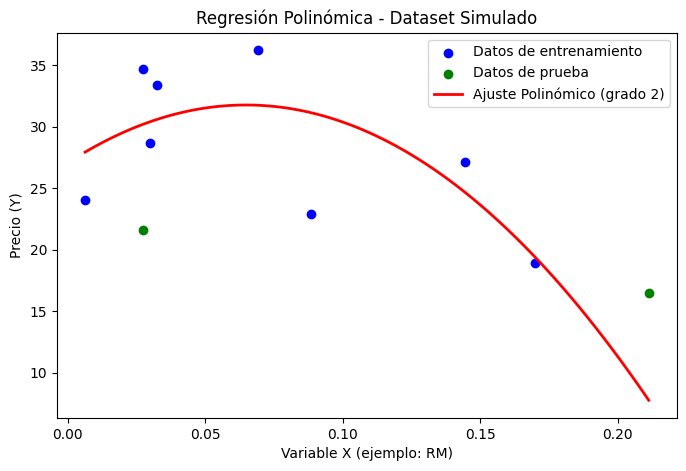

In [56]:
plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, color='blue', label='Datos de entrenamiento')
plt.scatter(X_test, y_test, color='green', label='Datos de prueba')
plt.plot(X_range, y_range_pred, color='red', linewidth=2, label=f'Ajuste Polinómico (grado {degree})')
plt.xlabel('Variable X (ejemplo: RM)')
plt.ylabel('Precio (Y)')
plt.title('Regresión Polinómica - Dataset Simulado')
plt.legend()
plt.show()

### **Interpretación de los resultados**

- **Coeficientes del polinomio**: muestran la contribución de cada término.  
- **MSE bajo**: indica que el modelo predice valores cercanos a los reales.  
- **R² cercano a 1**: indica que el modelo explica gran parte de la variación de los datos.  

Esta implementación muestra cómo la **regresión polinómica** captura relaciones no lineales que la regresión lineal simple no puede.
